# Part I - (Dataset Exploration Title)
## by (Peter Lemule)

## Introduction
> Introduce the dataset: The dataset, 201902-fordgobike-tripdata.csv, is downloaded from Ford GoBike and licensed by Ford GoBike. This dataset includes 519,700 trips with 15 features such as locations, time, and user attributes. There are start and end stations. I noticed that most trips happen on the same stations, so I subset the dataset by choosing top 8 trips start stations with the most trips



## Preliminary Wrangling


In [83]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [84]:
# Import Ford GoBike csv file into jupyter notebook
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [85]:
df.shape

(183412, 16)

In [86]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [87]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


### What is the structure of your dataset?

> The datasets consists of 183412 trips and 16 features

### What is/are the main feature(s) of interest in your dataset?

> The Trip duration might be the main feature of interest of this dataset, as it's for sure affect the revenue of the company, that's why I will study on this analysis the effect of other factors like user_type, trip start and end times, gender and age on the trip duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* user_type
* trip_duration
* end_station_name
* start_station_name
* start_time
* Gender and Age

In [88]:
# checking for the null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [89]:
# Percentage of missing data
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

duration_sec               0.00
start_time                 0.00
end_time                   0.00
start_station_id           0.11
start_station_name         0.11
start_station_latitude     0.00
start_station_longitude    0.00
end_station_id             0.11
end_station_name           0.11
end_station_latitude       0.00
end_station_longitude      0.00
bike_id                    0.00
user_type                  0.00
member_birth_year          4.51
member_gender              4.51
bike_share_for_all_trip    0.00
dtype: float64

In [90]:
# Since the we have that 4.51% is the highest record of missing values, it is better to drop the columns
df.dropna(axis = 0, inplace = True)

In [91]:
# Check the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [92]:
# Check unique values
df.nunique()

duration_sec                 4429
start_time                 174941
end_time                   174939
start_station_id              329
start_station_name            329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_name              329
end_station_latitude          329
end_station_longitude         329
bike_id                      4607
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [93]:
# Check for duplicated values
df.duplicated().sum()

0

In [94]:
# Check the datetypes
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [95]:
# columns start_time and end_time should be in the dtaetime format
# columns user_type and bike_share_for_all_trip should be in categorical datatype and not an object datatype
# start_station_id, end_station_id and bike_id should be object data type not numerical variables
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df['user_type'] = df['user_type'].astype('category')
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('category')
df['start_station_id'] = df['start_station_id'].astype('object')
df['end_station_id'] = df['end_station_id'].astype('object')
df['bike_id'] = df['bike_id'].astype('object')

In [96]:
# Corfim the changes made on the dtatype
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip          category
dtype: object

In [99]:
# Extract start_time_month and dayofweek, information from the start_time
df['start_time_dayofweek']= df['start_time'].dt.strftime('%a')
df['start_time_month'] = df['start_time'].dt.strftime('%B')

In [100]:
# day categories in order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# change type to ordered categorical
df['start_time_dayofweek']  =  pd.Categorical(df['start_time_dayofweek'], categories=weekday, ordered=True)

# check counts and order (not required)
df['start_time_dayofweek'].value_counts().sort_index()

Mon    25641
Tue    30584
Wed    28426
Thu    33712
Fri    27663
Sat    14414
Sun    14512
Name: start_time_dayofweek, dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null category
start_time_dayofweek       174952 non-null category
start_time_mo

In [102]:
# let's change the duration_sec to duration_min to make it more compact
df['duration_min'] = df['duration_sec'] / 60

In [103]:
df.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [104]:
# Looks like for at least 75% of the data are less than one hour, so end_time_hour will not be important.
# Extract Start_time_hourfrom start_time information
df['start_time_hour']= df['start_time'].dt.hour

In [105]:
# checking the unique values of the start_time_month
df['start_time_month'].unique()

array(['February'], dtype=object)

In [106]:
# create a new column member_age which is easier to relate with that the birth year though, it's still the same thing
# since the data set is 2019, we will be subtracting the birth year from 2019
df['member_age'] = 2019 - df['member_birth_year']
df['member_age'].head(2)

0    35.0
2    47.0
Name: member_age, dtype: float64

In [107]:
# Changing the dtype of both member_birth_year and member_age from float to int datatype.
df['member_age'] = df['member_age'].astype(int)
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [108]:
print(df['member_age'].head(2))
print(df['member_birth_year'].head(2))

0    35
2    47
Name: member_age, dtype: int64
0    1984
2    1972
Name: member_birth_year, dtype: int64


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null category
start_time_dayofweek       174952 non-null category
start_time_mont

In [110]:
quatile_range = list(np.arange(0.1, 1, 0.05))
df['duration_min'].quantile(quatile_range)

0.10     3.550000
0.15     4.200000
0.20     4.800000
0.25     5.383333
0.30     5.950000
0.35     6.550000
0.40     7.183333
0.45     7.816667
0.50     8.500000
0.55     9.250000
0.60    10.050000
0.65    10.950000
0.70    11.966667
0.75    13.150000
0.80    14.616667
0.85    16.500000
0.90    19.350000
0.95    25.516667
Name: duration_min, dtype: float64

In [111]:
# We remove outliers row
df = df[df['duration_min'] <= df['duration_min'].quantile(0.99)]

In [112]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_min,start_time_hour,member_age
count,173204.000000,173204.000000,173204.000000,173204.000000,173204.000000,173204.000000,173204.000000,173204.000000,173204.000000
mean,612.726138,37.771176,-122.351553,37.771362,-122.351117,1984.808665,10.212102,13.454822,34.191335
std,425.821242,0.100544,0.117839,0.100439,0.117387,10.112763,7.097021,4.739169,10.112763
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,1.016667,0.000000,18.000000
25%,321.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,5.350000,9.000000,27.000000
50%,506.000000,37.780760,-122.398279,37.781010,-122.397405,1987.000000,8.433333,14.000000,32.000000
75%,777.000000,37.797320,-122.283093,37.797673,-122.285171,1992.000000,12.950000,17.000000,39.000000
max,3176.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,52.933333,23.000000,141.000000


In [113]:
# copy the data set
df_clean = df.copy()
df_clean.to_csv('clean_ford_data.csv')

In [114]:
df.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_min,start_time_hour,member_age
count,173204.000000,173204.000000,173204.000000,173204.000000,173204.000000,173204.000000,173204.000000,173204.000000,173204.000000
mean,612.726138,37.771176,-122.351553,37.771362,-122.351117,1984.808665,10.212102,13.454822,34.191335
std,425.821242,0.100544,0.117839,0.100439,0.117387,10.112763,7.097021,4.739169,10.112763
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,1.016667,0.000000,18.000000
25%,321.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,5.350000,9.000000,27.000000
50%,506.000000,37.780760,-122.398279,37.781010,-122.397405,1987.000000,8.433333,14.000000,32.000000
75%,777.000000,37.797320,-122.283093,37.797673,-122.285171,1992.000000,12.950000,17.000000,39.000000
max,3176.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,52.933333,23.000000,141.000000


## Univariate Exploration



#### duration_min

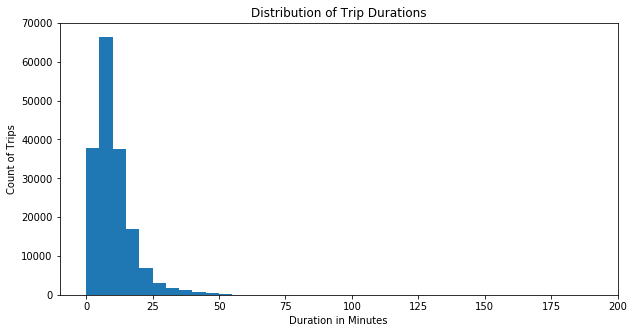

In [115]:
# plotting the duration_min data on a normal scale
binsize = 5
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration in Minutes')
plt.ylabel('Count of Trips')
plt.axis([-10, 200, 0, 70000])
plt.show()


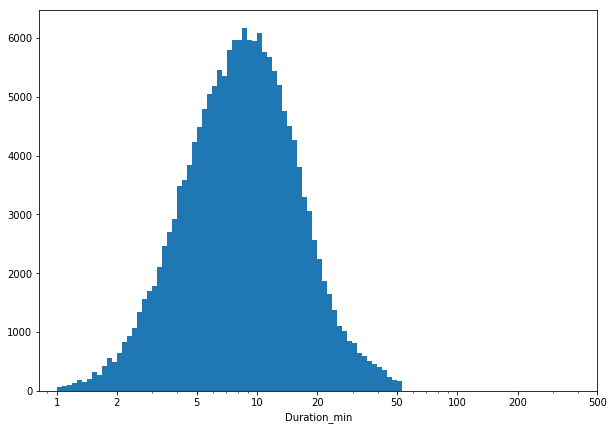

In [116]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 7]);
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500], [1, 2, 5, 10, 20, 50, 100, 200, 500]);
plt.xlabel('Duration_min');



In [117]:
# Functions to avoid repetition of codes
def countplot(data, x, color, order = None):
    plt.figure(figsize=[10, 7])
    base_color = sb.color_palette()[color]
    if order:
        order = df[x].value_counts().index
    sb.countplot(data = data, x = x, color = base_color, order = order)
    plt.title('Distribution of ' + x)
    plt.xlabel(x)
    plt.ylabel('Counts');
    
    
def piechart(x):
    sorted_counts = df[x].value_counts()
    plt.figure(figsize=[10,7])
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
    plt.axis('square')
    plt.title('Pie Chart of ' + x);

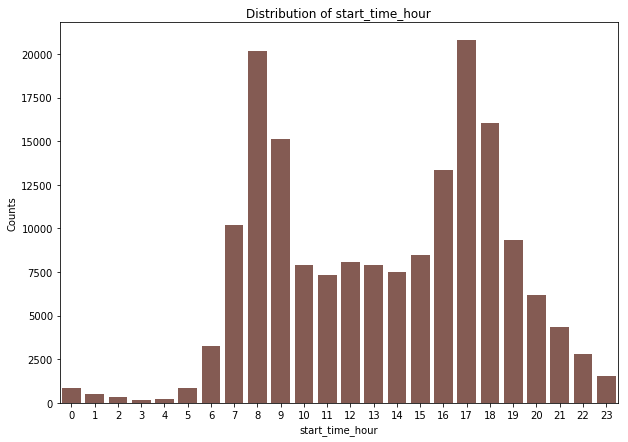

In [118]:
# a bar plot showing the peak start hours
countplot(data = df, x = 'start_time_hour', color = 5)

#### Check for start hours with the peak time

#### member_gender

In [119]:
df['member_gender'].value_counts()

Male      129347
Female     40310
Other       3547
Name: member_gender, dtype: int64

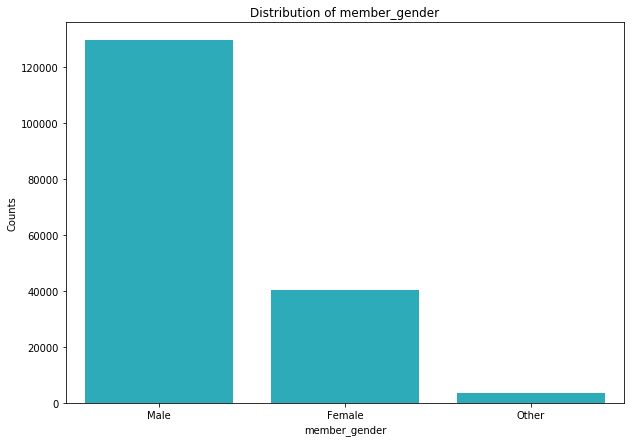

In [120]:
# Bar plot showing that most Bikers are Male
countplot(data = df, x = 'member_gender', color=9)

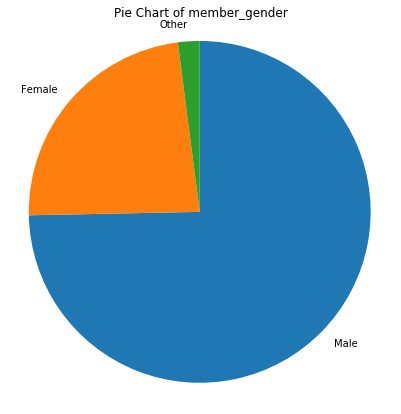

In [121]:
# A pie chart to justify the bar chart that most Bikers are Male
piechart('member_gender')

#### start and end stations 

In [122]:
df['start_station_name'].value_counts()[1:10]

San Francisco Caltrain Station 2  (Townsend St at 4th St)    3399
Berry St at 4th St                                           2933
Montgomery St BART Station (Market St at 2nd St)             2694
Powell St BART Station (Market St at 4th St)                 2570
San Francisco Caltrain (Townsend St at 4th St)               2565
San Francisco Ferry Building (Harry Bridges Plaza)           2493
Howard St at Beale St                                        2211
Steuart St at Market St                                      2174
Powell St BART Station (Market St at 5th St)                 2098
Name: start_station_name, dtype: int64

In [123]:
df['end_station_name'].value_counts()[1:10]

Market St at 10th St                                  3697
Montgomery St BART Station (Market St at 2nd St)      3438
San Francisco Ferry Building (Harry Bridges Plaza)    3109
San Francisco Caltrain (Townsend St at 4th St)        2864
Powell St BART Station (Market St at 4th St)          2824
Berry St at 4th St                                    2772
The Embarcadero at Sansome St                         2283
Steuart St at Market St                               2256
Powell St BART Station (Market St at 5th St)          2122
Name: end_station_name, dtype: int64

In [124]:
# since most start and end stations have the same frequency, we then add both together to get the counts
# select top 10
start_stations = df['start_station_name'].value_counts()
end_stations = df['end_station_name'].value_counts()
station_total = start_stations + end_stations

In [125]:
station_total.head()

10th Ave at E 15th St          90
10th St at Fallon St          683
10th St at University Ave     452
11th St at Bryant St         1733
11th St at Natoma St         1634
dtype: int64

In [126]:
station_total =  pd.DataFrame(station_total, index=None).reset_index().rename(columns={'index':'station', 0:'count'})

station_total.head()

,station,count
0,10th Ave at E 15th St,90
1,10th St at Fallon St,683
2,10th St at University Ave,452
3,11th St at Bryant St,1733
4,11th St at Natoma St,1634


In [127]:
top_10 = pd.DataFrame(start_stations.sort_values(ascending=False)[:10], 
                     index=None).reset_index().rename(columns={'index':'station', 'start_station_name':'count'})

In [128]:
top_10

,station,count
0,Market St at 10th St,3634
1,San Francisco Caltrain Station 2 (Townsend St...,3399
2,Berry St at 4th St,2933
3,Montgomery St BART Station (Market St at 2nd St),2694
4,Powell St BART Station (Market St at 4th St),2570
5,San Francisco Caltrain (Townsend St at 4th St),2565
6,San Francisco Ferry Building (Harry Bridges Pl...,2493
7,Howard St at Beale St,2211
8,Steuart St at Market St,2174
9,Powell St BART Station (Market St at 5th St),2098


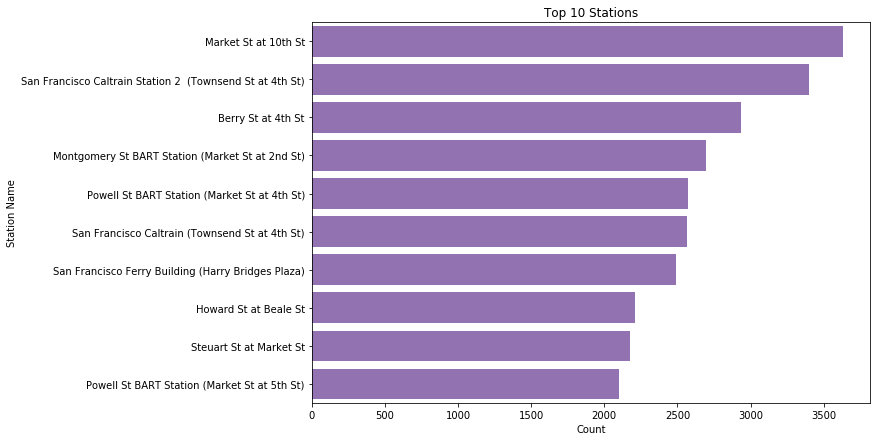

In [129]:
# plot the top ten stations
plt.figure(figsize = [10,7])
base_color = sb.color_palette()[4]
sb.barplot(data=top_10, y = 'station', x='count', color=base_color)
plt.title('Top 10 Stations')
plt.xlabel('Count')
plt.ylabel('Station Name')
plt.show();

#### Days of the week

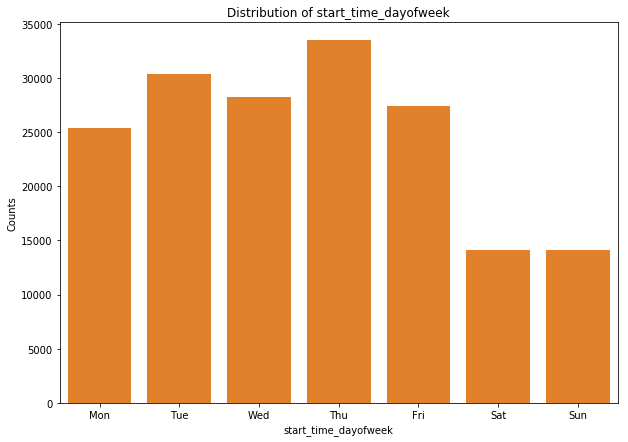

In [130]:
# A bar plot to show the counts for days of the week
# Most bikers work during the weekedays
countplot(data = df, x = 'start_time_dayofweek', color = 1)

#### Age

In [131]:
df['member_age'].describe()

count    173204.000000
mean         34.191335
std          10.112763
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

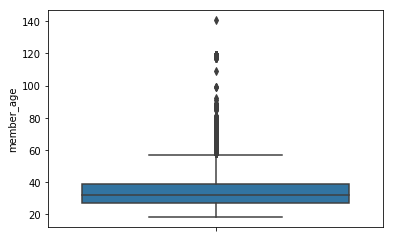

In [132]:
sb.boxplot(data = df, y = 'member_age');

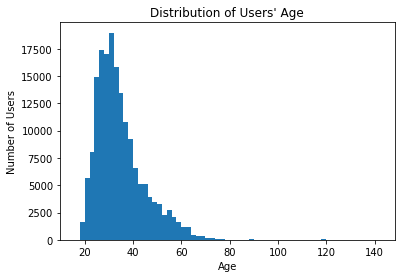

In [133]:
# This plot shows the age range of the Bikers
binsize = 2
bins = np.arange(16, df['member_age'].max()+binsize, binsize)
plt.hist(data = df, x = 'member_age', bins = bins);
plt.title("Distribution of Users' Age")
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

In [134]:
# group the ages into generation
def age_distribution(yob):
    if yob >= 1928 and yob <= 1945:
        return('Post War')
    elif yob >= 1946 and yob <= 1964:
        return('Baby Boomers')
    elif yob >= 1965 and yob <= 1980:
        return('Gen X')
    elif yob >= 1981 and yob <= 1996:
        return('Millenials')
    elif yob >= 1997 and yob <= 2012:
        return('Gen Z')
    else: np.NaN

In [135]:
# create member generation variables
df['member_generation'] = df['member_birth_year'].apply(age_distribution)

# create generations variable
generations = ['Post War','Baby Boomers', 'Gen X', 'Millenials',  'Gen Z']

# Order member_generation categorically
df['member_generation'] = pd.Categorical(df['member_generation'], categories = generations, ordered = True)

# Counts in order
df['member_generation'].value_counts().sort_index()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Post War           289
Baby Boomers      8592
Gen X            36189
Millenials      117290
Gen Z            10768
Name: member_generation, dtype: int64

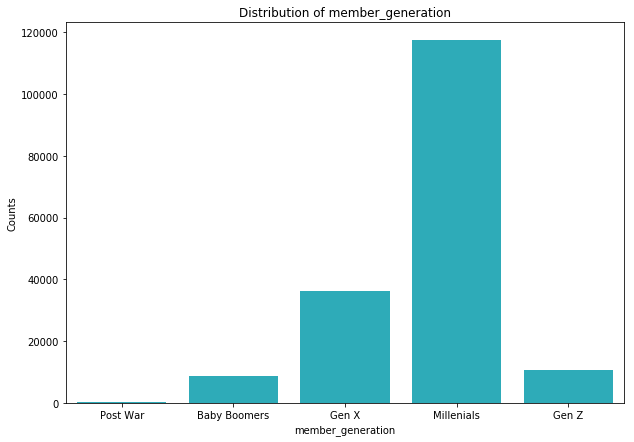

In [136]:
countplot(data = df, x = 'member_generation', color = 9)

#### Bikers Type

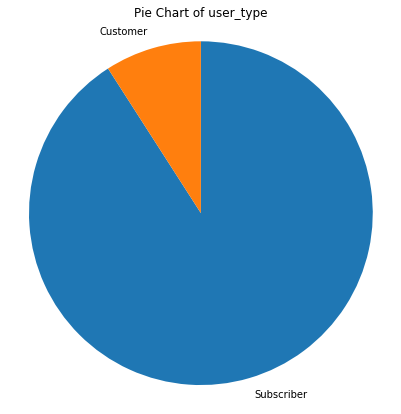

In [137]:
# Plot a pie chart to show the user_type
# It shows that most of the Bikers are Subscriber
piechart('user_type')

> Plotting the duration of trips using histogram shows that we need to scale. I apply log scaling to show to the plot which now shos that the duration of most trips are between 6 - 15 mins


> The rides across the week clearly shows that Thursday has the highest number of trips. Weekdays semms to be the most significant counts, while weekends (Saturday and Sunday) have the least counts

> The start stations and end stations have similar top records which is why it was added together and it was plotted in the graph to show the most top 10 most frequest places in San francisco

>The Bikers were splitted generations using their bith year after plotting it was observed that the millenials generation has the highest number i.e Bikers that are born between 1981 and 1996. The generation was gotten using birth_year

>Majority of the Bikers are subscribers, which can be seen from the  pie chart

>The hour of the day and the day of the week were extracted from the timestamp.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

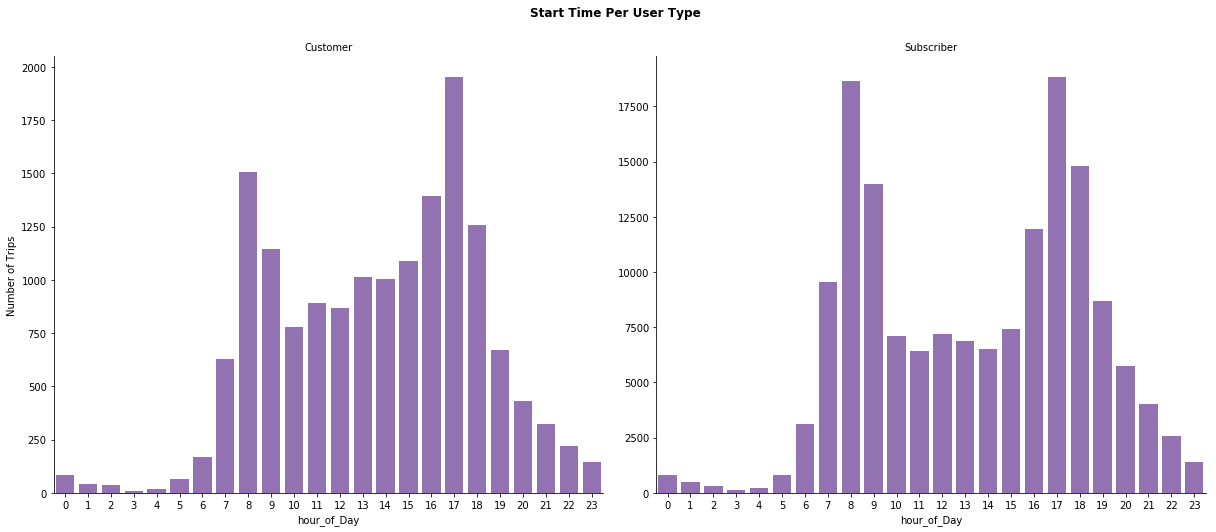

In [138]:
# User type per hour
base_color = sb.color_palette()[4]
user_per_hour = sb.factorplot(data=df, x='start_time_hour', col="user_type", kind='count', sharey = False, 
                                    color = base_color, size=7, aspect=1.2)
user_per_hour.set_axis_labels("hour_of_Day", "Number of Trips")
user_per_hour.set_titles("{col_name}")
user_per_hour.fig.suptitle('Start Time Per User Type', y=1.05, fontsize=12, fontweight='semibold');

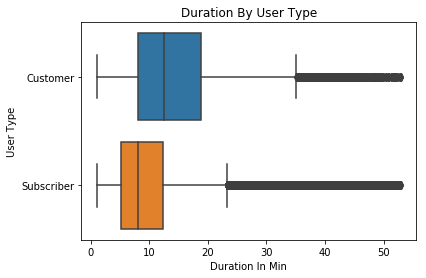

In [139]:
# Duration of usertypes per minutes
sb.boxplot(data =df , y='user_type', x='duration_min')
plt.title('Duration By User Type')
plt.xlabel('Duration In Min')
plt.ylabel('User Type');

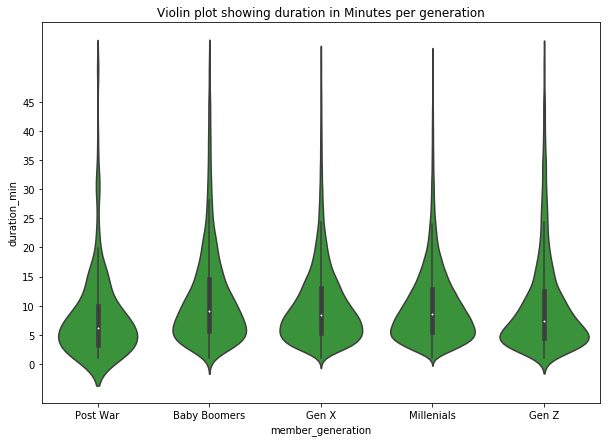

In [140]:
base_color = sb.color_palette()[2]
plt.figure(figsize=(10,7))
sb.violinplot(data = df, x='member_generation', y= 'duration_min', color = base_color)
plt.title('Violin plot showing duration in Minutes per generation')
plt.yticks(np.arange(0, 50, step=5));

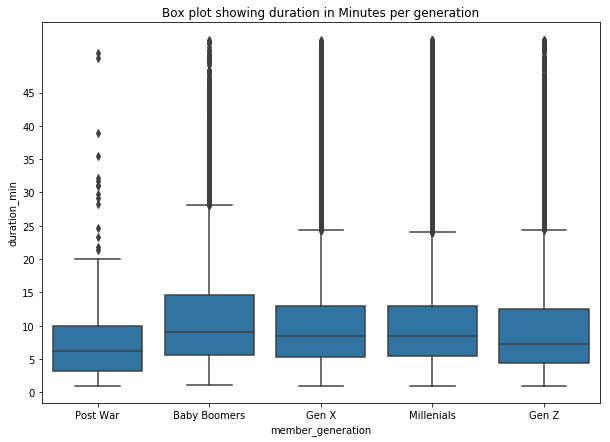

In [141]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(10,7))
sb.boxplot(data = df, x='member_generation', y= 'duration_min', color = base_color)
plt.title('Box plot showing duration in Minutes per generation')
plt.yticks(np.arange(0, 50, step=5));


>From the factor plot, after splitting the hour per usage into customer and subscribers, it clearly shows that most customers have their start time at 17:00, follwed by 8:00 but subscribers have thier peake hours at 8:00 and 17:00 which clearly shows that some of the importance of Bivariate to Univariate

> I found that the duration minutes were different for Customers and Subscribers. Subscribers have their most duration minutes between 7 - 16 minutes while Customers have their most duration between 5 - 12 minutes.

>The box plot gives more summary details visibly than the violin plot. From the box plot, it is noticed that the Baby Boomers ride for the longest time compared to the other generations.The Post War generation have the least riding duration and this is likely due to age.

## Multivariate Exploration

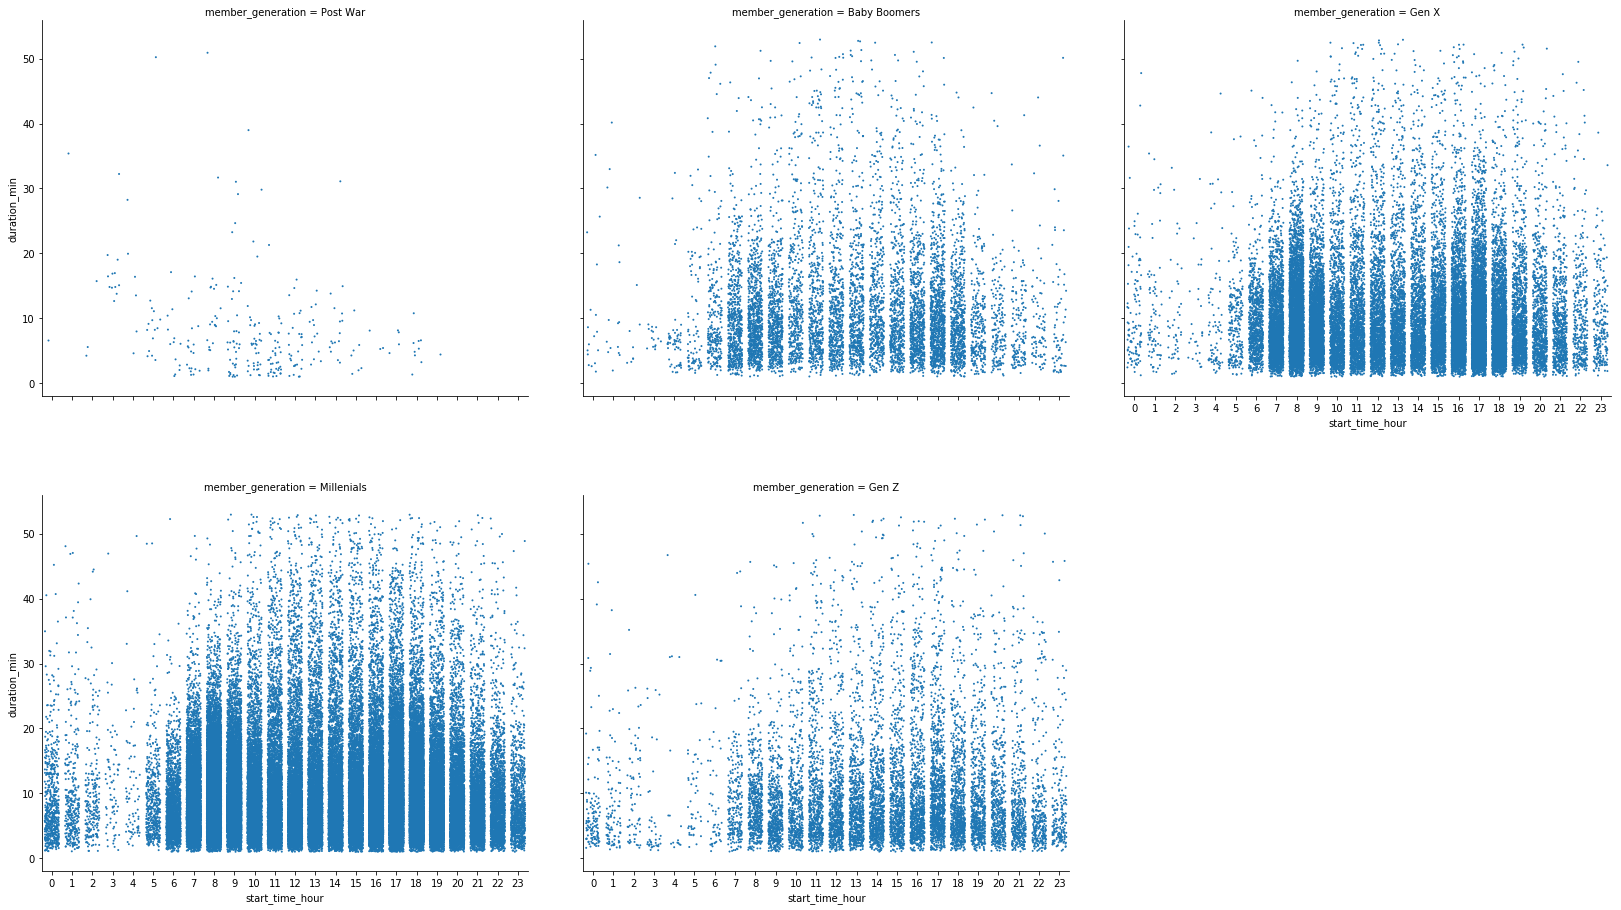

In [142]:
# This plot compares the start_time_hour and the duration_min in regards to generations
g = sb.FacetGrid(data = df, col = 'member_generation', col_wrap = 3)
g.map(sb.stripplot, 'start_time_hour', 'duration_min', size = 2, jitter = 0.35, order = None);

g.fig.set_size_inches(24, 14)

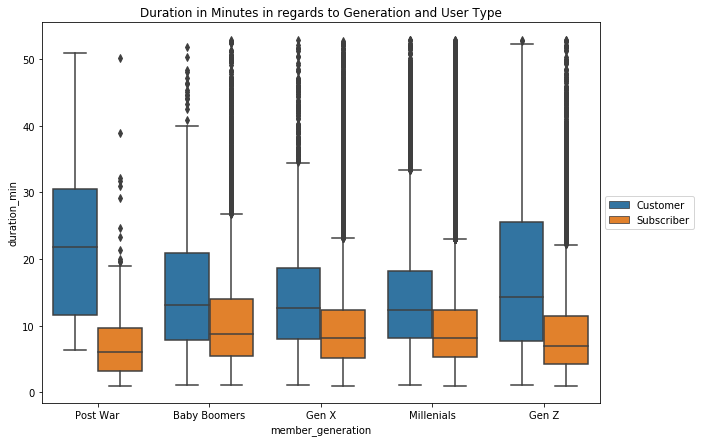

In [143]:
plt.figure(figsize=[10, 7])
sb.boxplot(data = df, x = 'member_generation', y = 'duration_min', hue = 'user_type')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))
plt.title('Duration in Minutes in regards to Generation and User Type');


>From the boxplot for duration in Minutes in regards to Generation and User Type shows that it's the post customer usertype that has the least duration minutes and the post war subscribers have the Highest duration in Minutes


## Conclusions
> From the data set, 8am and 9pm have the highest number of trips

> Customers have the lowest duration minutes while subscribers are the highest

> Majority of the Bikers are subscribers, which can be seen from the  pie chart

> Most bikers falls within the Millenials Generation that is they are born between 1981 and 1996